In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import inequalipy as ineq
import numpy as np
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

### Load country wise data

In [2]:
country_df = pd.DataFrame()

for year in range(1995,2022):
  country = pd.read_json(f'data/{year}/Destinations-{year}.json')
  country['Year'] = year
  country_df = pd.concat([country_df, country], ignore_index=True)

country_df

,Continent ID,Continent,Country ID,Country,ISO 3,Trade Value,Year
0,af,Africa,afago,Angola,ago,15783.0,1995
1,af,Africa,afbdi,Burundi,bdi,343178.0,1995
2,af,Africa,afben,Benin,ben,168078.0,1995
3,af,Africa,afbfa,Burkina Faso,bfa,4250.0,1995
4,af,Africa,afciv,Cote d'Ivoire,civ,8145776.0,1995
...,...,...,...,...,...,...,...
4603,sa,South America,saguy,Guyana,guy,136881.0,2021
4604,sa,South America,saper,Peru,per,74117019.0,2021
4605,sa,South America,sapry,Paraguay,pry,6690947.0,2021
4606,sa,South America,sasur,Suriname,sur,133244.0,2021


In [3]:
continent_df = pd.DataFrame()
continent_list = country_df['Continent'].unique()

for year in range(1995,2022):
  year_df = pd.DataFrame({'Year': year}, index=[0])
  year_df.columns = pd.MultiIndex.from_product([[''], ['Year']])
  trading_df = pd.DataFrame()
  for continent_name in continent_list:
    trade_value = country_df[(country_df['Continent'] == continent_name) & (country_df['Year'] == year)]['Trade Value'].sum()
    no_of_countries = len(country_df[(country_df['Continent'] == continent_name) & (country_df['Year'] == year)]['Country'].unique())
    df = pd.DataFrame({'Trade Value': trade_value, 'No of Countries': no_of_countries}, index=[0])
    df.columns = pd.MultiIndex.from_product([[continent_name], ['Trade Value', 'No of Countries']])
    # df.columns = [[continent_name, continent_name], ['Trade Value', 'No of Countries']]
    trading_df = trading_df.join(df, how='outer')
  year_df = pd.merge(year_df, trading_df, how='outer', left_index=True, right_index=True)
  continent_df = pd.concat([continent_df, year_df], ignore_index=True)

continent_df

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2499216846.py:14: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2499216846.py:14: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2499216846.py:14: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2499216846.py:14: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2499216846.py:14: FutureWarning:

merging between different levels is deprecated and will be removed i

Africa                          Asia                  \
    Year  Trade Value No of Countries   Trade Value No of Countries   
0   1995   89249638.0              35  8.310679e+08              35   
1   1996   81046068.0              34  7.568836e+08              37   
2   1997   91036561.0              36  8.118759e+08              35   
3   1998   58991037.0              36  7.239778e+08              40   
4   1999   26554386.0              25  4.885110e+08              24   
5   2000   52053767.0              41  8.518213e+08              38   
6   2001   84214675.0              42  8.252599e+08              41   
7   2002   60506036.0              45  8.188249e+08              42   
8   2003   68572316.0              47  9.156676e+08              46   
9   2004  107525792.0              48  1.080533e+09              47   
10  2005  126875668.0              47  1.291757e+09              46   
11  2006  119474489.0              46  2.250710e+09              49   
12  2007  150473903.0              48  2.264091e+09              49   
13  2008  216876557.0              50  2.252566e+09              47   
14  2009  263637475.0              50  2.399043e+09              50   
15  2010  262828883.0              50  3.344813e+09              50   
16  2011  308628813.0              52  4.304888e+09              49   
17  2012  488416090.0              51  4.816313e+09              50   
18  2013  282230765.0              50  5.228702e+09              49   
19  2014  245820842.0              39  5.157969e+09              41   
20  2015  350871524.0              49  5.977045e+09              50   
21  2016  272419433.0              44  5.810213e+09              42   
22  2017  362387224.0              42  6.038887e+09              44   
23  2018  383493197.0              40  6.758411e+09              43   
24  2019  302807424.0              38  7.187539e+09              43   
25  2020  267979737.0              35  6.153821e+09              40   
26  2021  308222921.0              28  8.089244e+09              39   

          Europe                 North America                       Oceania  \
     Trade Value No of Countries   Trade Value No of Countries   Trade Value   
0   2.088523e+09              33  1.684155e+09              21  2.516412e+07   
1   2.415500e+09              35  1.720544e+09              22  2.589644e+07   
2   2.751268e+09              36  2.140156e+09              22  4.732544e+07   
3   2.991995e+09              36  2.355957e+09              24  3.664082e+07   
4   2.429398e+09              37  2.152173e+09              17  3.053759e+07   
5   3.523410e+09              39  2.905457e+09              25  5.387724e+07   
6   3.889969e+09              39  3.052266e+09              24  3.559442e+07   
7   3.768809e+09              40  2.627199e+09              25  3.455552e+07   
8   5.060737e+09              39  2.793789e+09              25  4.178485e+07   
9   6.554109e+09              39  3.225909e+09              26  4.471812e+07   
10  6.321006e+09              39  3.523695e+09              24  5.013547e+07   
11  8.275953e+09              40  4.219514e+09              25  4.515308e+07   
12  9.170619e+09              40  4.376015e+09              26  5.217594e+07   
13  1.059636e+10              41  4.950900e+09              27  6.862120e+07   
14  1.107040e+10              40  4.958475e+09              25  1.548910e+08   
15  1.226585e+10              41  5.997062e+09              26  1.896063e+08   
16  1.645900e+10              40  6.770815e+09              25  3.216282e+08   
17  1.602560e+10              41  6.596081e+09              26  4.510812e+08   
18  1.845289e+10              40  7.160237e+09              27  5.206207e+08   
19  2.046082e+10              40  6.799799e+09              20  5.557598e+08   
20  2.140603e+10              40  7.908006e+09              27  7.297639e+08   
21  2.301658e+10              40  7.642565e+09              20  7.399845e+08   
22  2.533810e+10              40  7

In [4]:
# summation of trade value of all continents for each year

trade_value_year_df = pd.DataFrame()

for year in range(1995,2022):
  total_trade_value = country_df[country_df['Year'] == year]['Trade Value'].sum()
  df = pd.DataFrame({'Year': year, 'Total Trade Value': total_trade_value}, index=[0])
  trade_value_year_df = pd.concat([trade_value_year_df, df], ignore_index=True)

trade_value_year_df

,Year,Total Trade Value
0,1995,4.745175e+09
1,1996,5.034831e+09
2,1997,5.874774e+09
3,1998,6.200921e+09
4,1999,5.143729e+09
5,2000,7.414276e+09
6,2001,7.914706e+09
7,2002,7.326809e+09
8,2003,8.899790e+09
9,2004,1.103734e+10


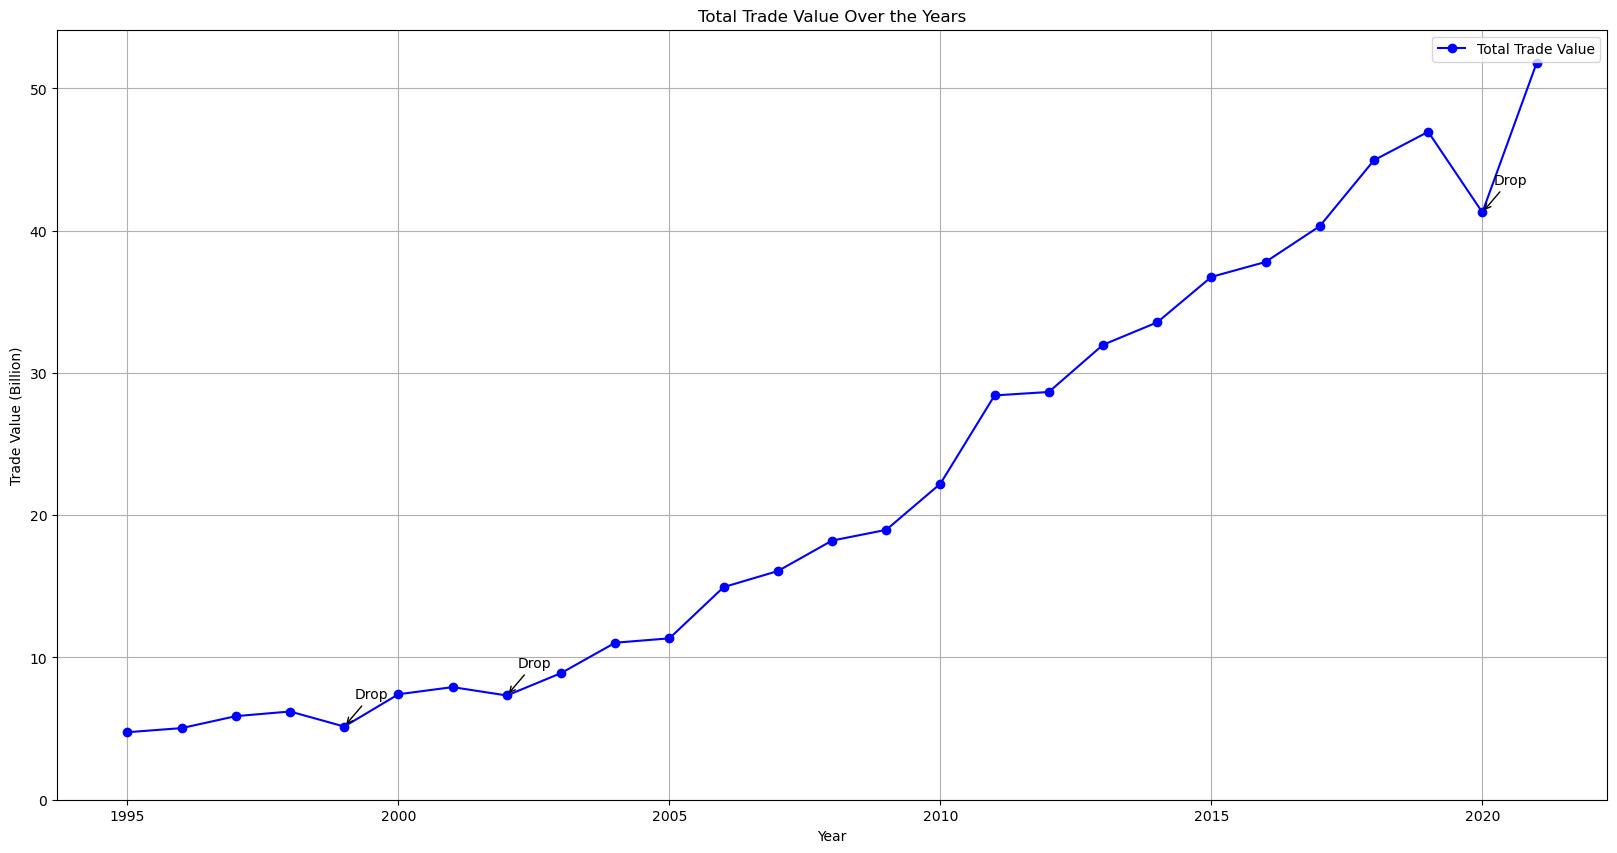

In [5]:
# Plotting trade value
years = trade_value_year_df['Year']
trade_value_billion = trade_value_year_df['Total Trade Value'] / 1e9

drop_positions = [i for i in range(1, len(trade_value_billion)) if trade_value_billion[i] < trade_value_billion[i-1]]

plt.figure(figsize=(20,10))
plt.plot(years, trade_value_billion, marker='o', linestyle='-', color='b', label='Total Trade Value')

for position in drop_positions:
    plt.annotate('Drop', xy=(years[position], trade_value_billion[position]),
                 xytext=(years[position] + 0.2, trade_value_billion[position] + 2),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

# Set plot properties
plt.title('Total Trade Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Trade Value (Billion)')
plt.grid(True)
plt.legend()
plt.ylim(0)  # Ensure y-axis does not show negative values

# Display the graph
plt.show()

In [6]:
# summation of no of countries of all continents for each year

no_of_countries_year_df = pd.DataFrame()

for year in range(1995,2022):
  no_of_countries = country_df[country_df['Year'] == year]['Country'].count()
  df = pd.DataFrame({'Year': year, 'No of countries': no_of_countries}, index=[0])
  no_of_countries_year_df = pd.concat([no_of_countries_year_df, df], ignore_index=True)

no_of_countries_year_df

,Year,No of countries
0,1995,138
1,1996,146
2,1997,148
3,1998,156
4,1999,118
5,2000,167
6,2001,167
7,2002,174
8,2003,183
9,2004,187


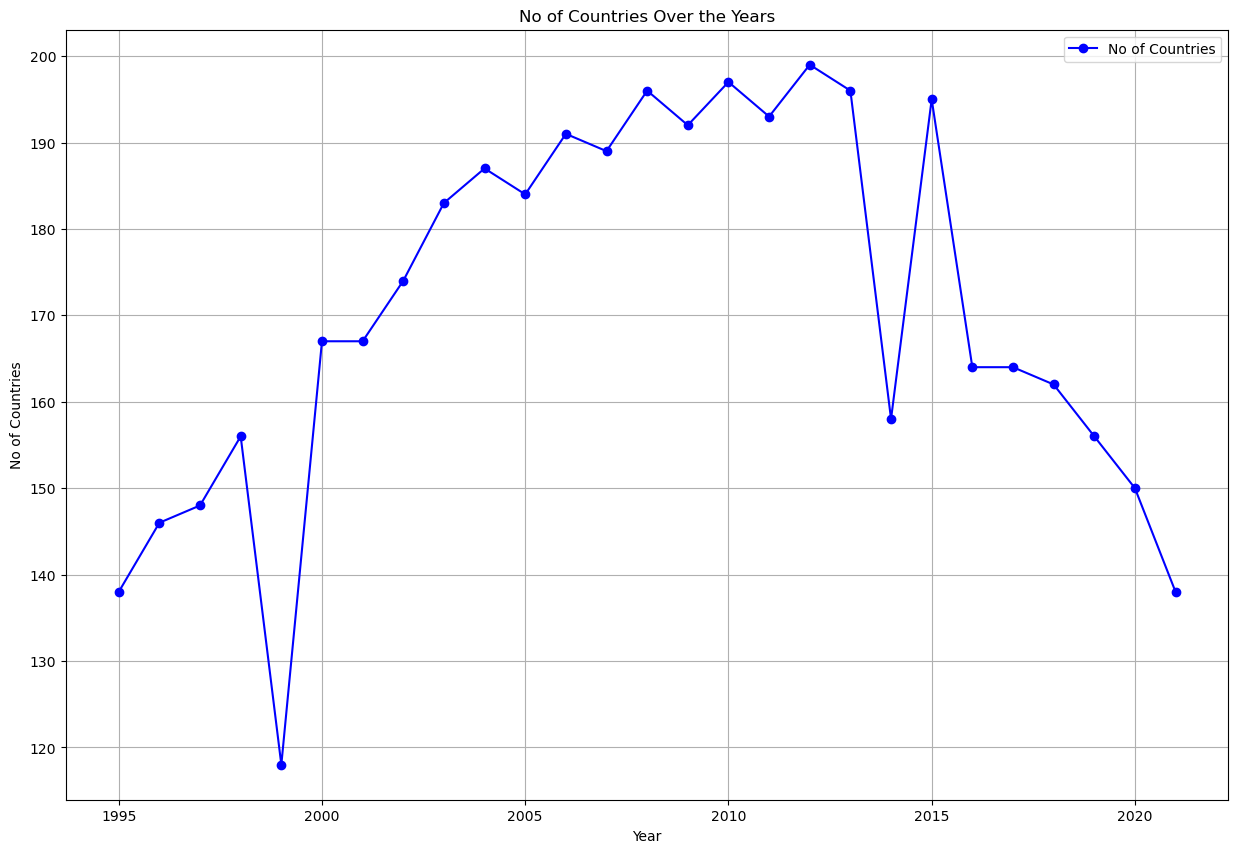

In [7]:
plt.figure(figsize=(15,10))
plt.plot(no_of_countries_year_df['Year'], no_of_countries_year_df['No of countries'], marker='o', linestyle='-', color='b', label='No of Countries')
plt.xlabel('Year')
plt.ylabel('No of Countries')
plt.title('No of Countries Over the Years')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# accessing multi level index no of countries for africa by year

years_list = []
no_of_countries_list = []
continent_list = country_df['Continent'].unique()
continent_list_plot = []

for year in range(1995,2022):
  for continent in continent_list:
    years_list.append(year)
    continent_list_plot.append(continent)
    no_of_countries_list.append(country_df[(country_df['Continent'] == continent) & (country_df['Year'] == year)]['Country'].count())

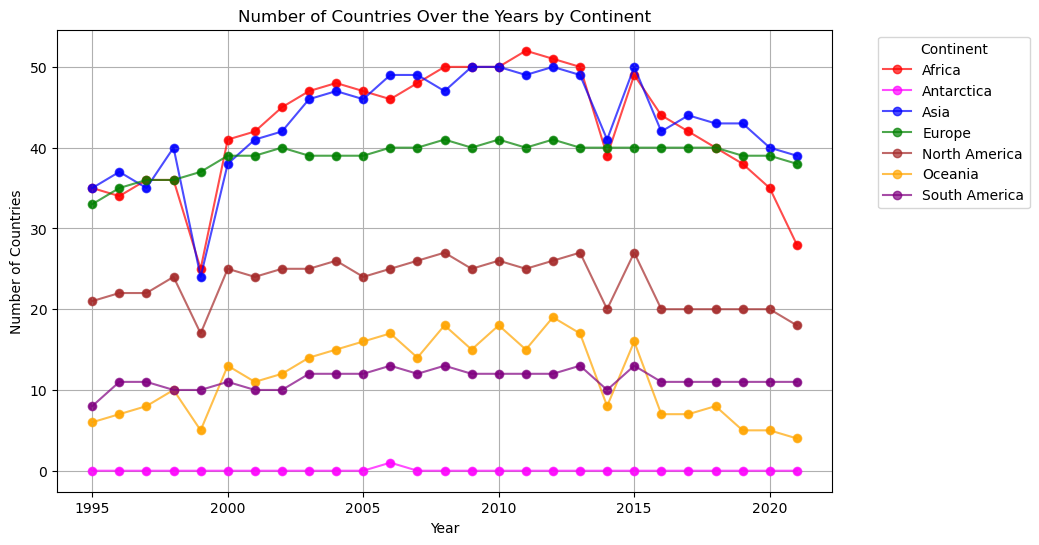

In [9]:
data = {
    'Continent': continent_list_plot,
    'No of Countries': no_of_countries_list,
    'Year': years_list
}

df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a color map for each continent
colors = ['red', 'blue', 'green', 'brown', 'orange', 'purple', 'magenta']
color_map = dict(zip(continent_list, colors))

# Plotting each data point
for continent, group in df.groupby('Continent'):
    plt.scatter(group['Year'], group['No of Countries'], label='', color=color_map[continent], s=20, alpha=0.7)
    plt.plot(group['Year'], group['No of Countries'], label=continent, color=color_map[continent], marker='o', linestyle='-', alpha=0.7)

# Set plot properties
plt.title('Number of Countries Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the graph
plt.show()


In [10]:
years_list = []
trade_country_list = []
continent_list = country_df['Continent'].unique()
continent_list_plot = []

for year in range(1995,2022):
  for continent in continent_list:
    years_list.append(year)
    continent_list_plot.append(continent)
    trade_country_list.append(country_df[(country_df['Continent'] == continent) & (country_df['Year'] == year)]['Trade Value'].sum())

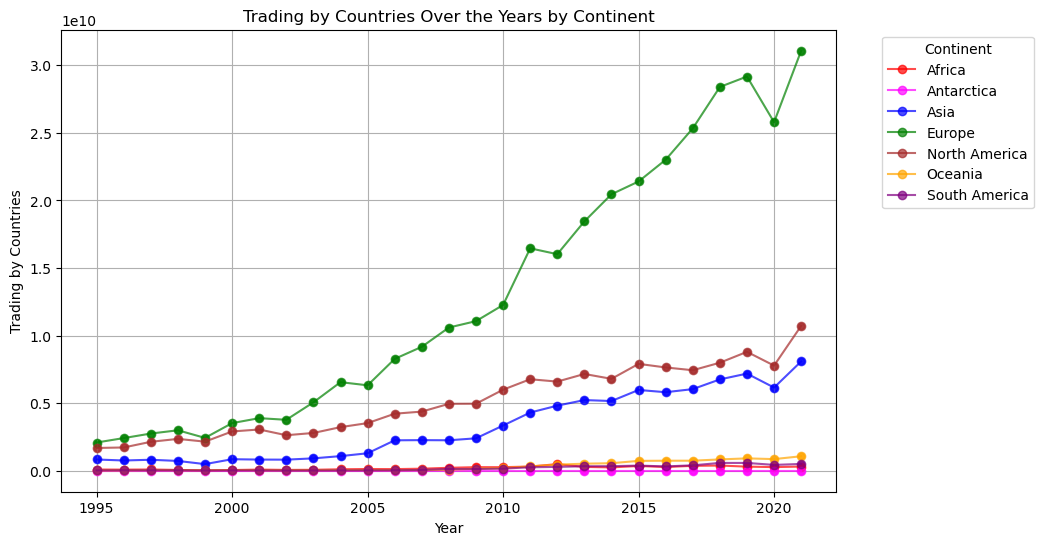

In [11]:
data = {
    'Continent': continent_list_plot,
    'Trading by Countries': trade_country_list,
    'Year': years_list
}

df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a color map for each continent
colors = ['red', 'blue', 'green', 'brown', 'orange', 'purple', 'magenta']
color_map = dict(zip(continent_list, colors))

# Plotting each data point
for continent, group in df.groupby('Continent'):
    plt.scatter(group['Year'], group['Trading by Countries'], label='', color=color_map[continent], s=20, alpha=0.7)
    plt.plot(group['Year'], group['Trading by Countries'], label=continent, color=color_map[continent], marker='o', linestyle='-', alpha=0.7)

# Set plot properties
plt.title('Trading by Countries Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Trading by Countries')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the graph
plt.show()

### Load product wise data

In [12]:
product_df = pd.DataFrame()

for year in range(1995,2022):
  product = pd.read_json(f'data/{year}/Exports-{year}.json')
  product['Year'] = year
  product_df = pd.concat([product_df, product], ignore_index=True)

product_df

,Section ID,Section,HS2 ID,HS2,Trade Value,Year
0,1,Animal Products,101,Live animals,508144.0,1995
1,1,Animal Products,102,Meat & edible offal,2655370.0,1995
2,1,Animal Products,103,"Fish, crustaceans, & molluscs",334660947.0,1995
3,1,Animal Products,104,"Edible products of animal origin, n.e.s.",409477.0,1995
4,1,Animal Products,105,"Animal originated products, n.e.s.",2906866.0,1995
...,...,...,...,...,...,...
2534,19,Weapons,1993,Weapons,632888.0,2021
2535,20,Miscellaneous,2094,"Furniture, bedding, lamps, & prefab buildings",117318181.0,2021
2536,20,Miscellaneous,2095,"Toys, games, & sports",94169455.0,2021
2537,20,Miscellaneous,2096,Misc. manufactures,20745862.0,2021


In [13]:
max_min_trade_df = pd.DataFrame()
section_list = product_df['Section'].unique()

for i in range(1995,2022):
  trade_value_list = []
  for section in section_list:
    trade_value = product_df[(product_df['Section'] == section) & (product_df['Year'] == i)]['Trade Value'].sum()
    trade_value_list.append(trade_value)
  max_trade_value = max(trade_value_list)
  max_trade_section = section_list[trade_value_list.index(max_trade_value)]
  min_trade_value = min(trade_value_list)
  min_trade_section = section_list[trade_value_list.index(min_trade_value)]
  df = pd.DataFrame({'Year': i, 'Section with maximum trading': max_trade_section, 'Max Trade Value': max_trade_value, 'Section with minimum trading': min_trade_section, 'Min Trade Value': min_trade_value}, index=[0])
  max_min_trade_df = pd.concat([max_min_trade_df, df], ignore_index=True)

max_min_trade_df

,Year,Section with maximum trading,Max Trade Value,Section with minimum trading,Min Trade Value
0,1995,Textiles,3.493751e+09,Weapons,0.0
1,1996,Textiles,3.778744e+09,Weapons,0.0
2,1997,Textiles,4.650340e+09,Weapons,3462.0
3,1998,Textiles,5.064262e+09,Weapons,60422.0
4,1999,Textiles,4.221057e+09,Weapons,0.0
5,2000,Textiles,6.020337e+09,Weapons,0.0
6,2001,Textiles,6.569643e+09,Weapons,4125.0
7,2002,Textiles,6.141269e+09,Weapons,0.0
8,2003,Textiles,7.579198e+09,Arts and Antiques,99925.0
9,2004,Textiles,9.396098e+09,Precious Metals,328663.0


In [14]:
hs2_textiles_df = pd.DataFrame()
hs2_textiles_list = product_df[product_df['Section'] == 'Textiles']['HS2'].unique()
hs2_dict = {'Year':[]}

for year in range(1995,2022):
  hs2_dict['Year'].append(year)
  for hs2 in hs2_textiles_list:
    trade_value = product_df[(product_df['HS2'] == hs2) & (product_df['Year'] == year)]['Trade Value'].sum()
    if hs2 in hs2_dict:
      hs2_dict[hs2].append(trade_value)
    else:
      hs2_dict[hs2] = [trade_value]

hs2_textiles_df = pd.DataFrame(hs2_dict)

hs2_textiles_df

,Year,Silk,Wool & animal hair,Cotton,"Vegetable textile fibers, paper yarn & fabrics",Man-made filaments,Man-made staple fibres,"Wadding, felt, nonwovens, twin, ropes, & articles thereof",Carpets & textile floor covers,Special woven fabrics and tapestries,"Coated, covered, & laminated fabrics for industrial use",Knitted fabrics,Knitted clothing accesories,Non-knitted clothing accesories,Used clothes & textile articles
0,1995,573789.0,54033.0,13612916.0,286318608.0,510064.0,7848987.0,46540538.0,8398072.0,43826004.0,211227.0,5661059.0,8.649106e+08,2.013173e+09,2.021123e+08
1,1996,149647.0,85886.0,11404967.0,278338349.0,538159.0,29233220.0,44581123.0,10193134.0,39854576.0,192280.0,3685458.0,1.117383e+09,2.010255e+09,2.328500e+08
2,1997,25984.0,151778.0,20121958.0,302408664.0,865837.0,37406302.0,40442351.0,6505268.0,53812086.0,527095.0,683446.0,1.392739e+09,2.557709e+09,2.369411e+08
3,1998,116055.0,70796.0,31294874.0,257005290.0,793049.0,34506336.0,30908996.0,4573306.0,21209437.0,964309.0,7839538.0,1.556177e+09,2.899283e+09,2.195201e+08
4,1999,64719.0,480417.0,6633348.0,197444557.0,1731657.0,2670310.0,8511873.0,2180854.0,1248876.0,487458.0,1089588.0,1.463512e+09,2.370993e+09,1.640082e+08
5,2000,12005715.0,1416090.0,27454964.0,280061050.0,8065093.0,8849055.0,32974271.0,3396280.0,21058812.0,228002.0,6465875.0,2.038519e+09,3.306736e+09,2.731064e+08
6,2001,16241476.0,805971.0,33137497.0,293374992.0,14139596.0,7746202.0,30189003.0,1632887.0,23596004.0,502778.0,20549867.0,2.307335e+09,3.484206e+09,3.361861e+08
7,2002,374619.0,257863.0,21421117.0,286355645.0,3016016.0,5001357.0,20398461.0,1645204.0,20438917.0,650394.0,1090249.0,2.359346e+09,3.022623e+09,3.986497e+08
8,2003,246809.0,443033.0,21608099.0,274624147.0,2981262.0,5079117.0,21259790.0,2377535.0,36024891.0,222824.0,1218317.0,3.207734e+09,3.635130e+09,3.702484e+08
9,2004,296711.0,522973.0,34561682.0,330508130.0,6329323.0,12733315.0,25004186.0,3493026.0,49782667.0,719256.0,1049748.0,4.255054e+09,4.247171e+09,4.288727e+08


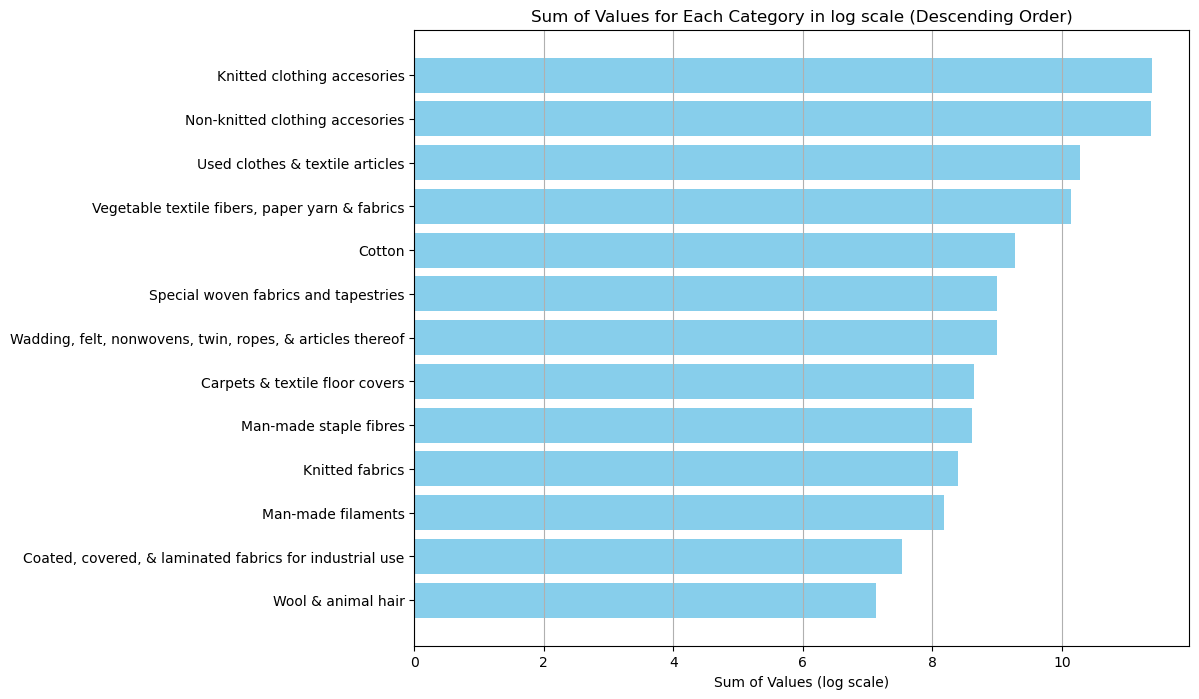

In [15]:
categories = hs2_textiles_df.columns[2:]

# Calculate the sum of values for each category
category_sums = np.log10(hs2_textiles_df[categories].sum())

# Sort the category sums in descending order
sorted_category_sums = category_sums.sort_values()

# Plotting the horizontal histogram
plt.figure(figsize=(10, 8))
plt.barh(sorted_category_sums.index, sorted_category_sums, color='skyblue')
plt.xlabel('Sum of Values (log scale)')
plt.title('Sum of Values for Each Category in log scale (Descending Order)')
plt.grid(axis='x')

# Show the plot
plt.show()

### Comparing Trade Values to GDP per year

In [16]:
gdp_df = pd.read_csv('data/bd-gdp.csv')
gdp_df['Textile Trade Value (USD in Billions)'] = (max_min_trade_df['Max Trade Value'] / 1e9).round(3)
gdp_df['Proportion of GDP for Textile (%)'] = ((gdp_df['Textile Trade Value (USD in Billions)'] / gdp_df['GDP (USD in Billions)']).round(3))*100

gdp_df

,Year,GDP (USD in Billions),Textile Trade Value (USD in Billions),Proportion of GDP for Textile (%)
0,1995,51.842,3.494,6.7
1,1996,55.445,3.779,6.8
2,1997,57.599,4.650,8.1
3,1998,59.879,5.064,8.5
4,1999,61.526,4.221,6.9
5,2000,63.549,6.020,9.5
6,2001,64.660,6.570,10.2
7,2002,66.227,6.141,9.3
8,2003,71.917,7.579,10.5
9,2004,78.046,9.396,12.0


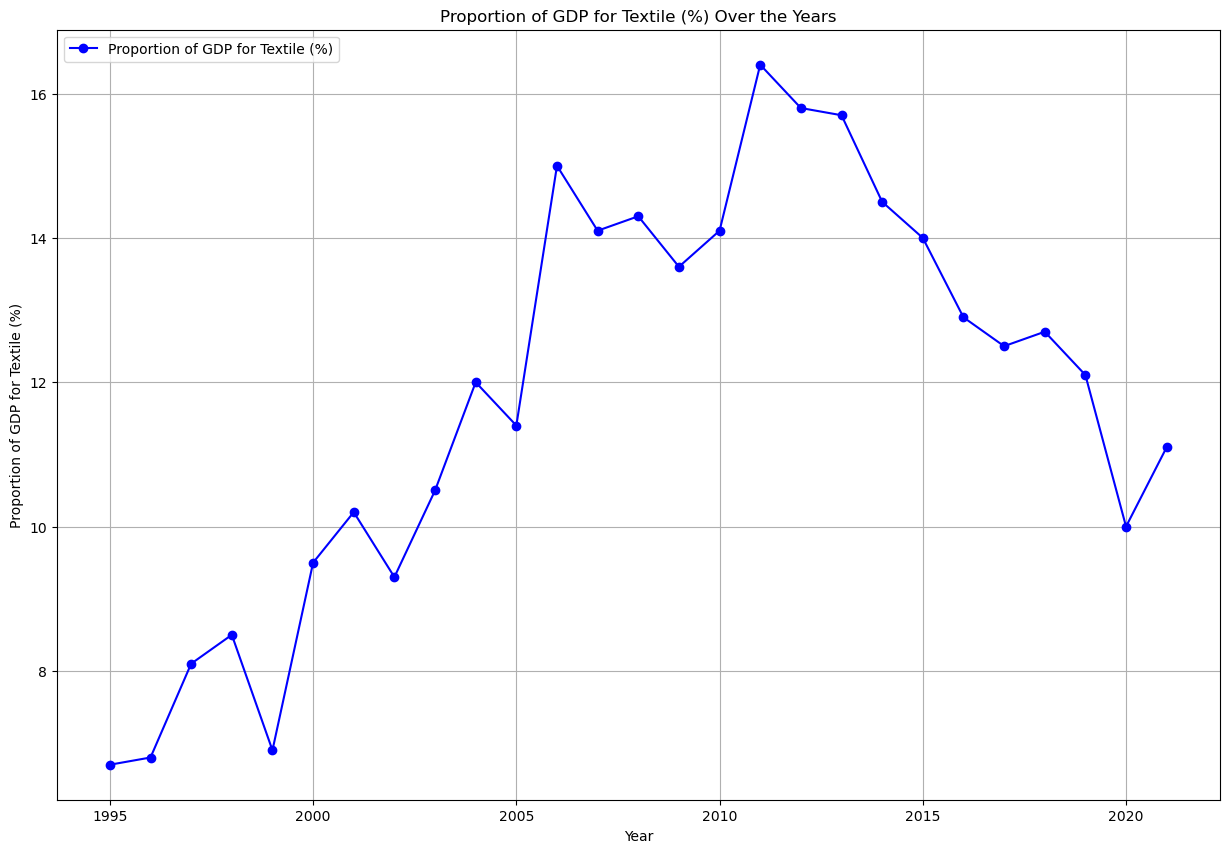

In [17]:
plt.figure(figsize=(15,10))
plt.plot(gdp_df['Year'], gdp_df['Proportion of GDP for Textile (%)'], marker='o', linestyle='-', color='b', label='Proportion of GDP for Textile (%)')
plt.xlabel('Year')
plt.ylabel('Proportion of GDP for Textile (%)')
plt.title('Proportion of GDP for Textile (%) Over the Years')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Gini Coefficient

In [18]:
gini_df = pd.DataFrame()
gini_list = []

for year in range(1995,2022):
  section_list = product_df['Section'].unique()
  trade_value_list = []
  for section in section_list:
    trade_value = product_df[(product_df['Section'] == section) & (product_df['Year'] == year)]['Trade Value'].sum()
    trade_value_list.append(trade_value)
  gini_list.append(ineq.gini(trade_value_list))

gini_df['Year'] = range(1995,2022)
gini_df['Gini Coefficient'] = gini_list

gini_df

,Year,Gini Coefficient
0,1995,0.868271
1,1996,0.870078
2,1997,0.879163
3,1998,0.887149
4,1999,0.903861
5,2000,0.890124
6,2001,0.895932
7,2002,0.896424
8,2003,0.896030
9,2004,0.896355


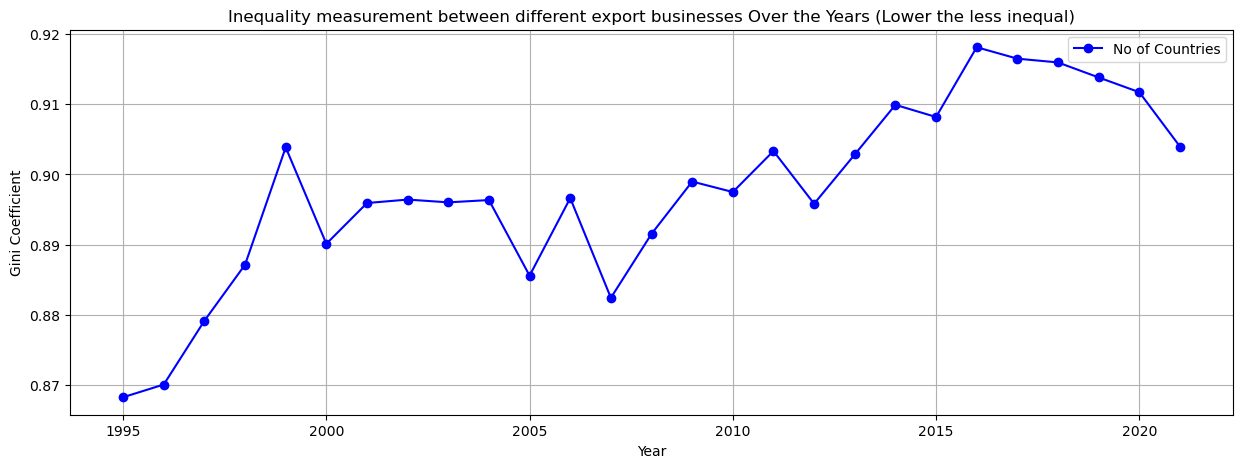

In [19]:
plt.figure(figsize=(15,5))
plt.plot(gini_df['Year'], gini_df['Gini Coefficient'], marker='o', linestyle='-', color='b', label='No of Countries')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.title('Inequality measurement between different export businesses Over the Years (Lower the less inequal)')
plt.grid(True)
plt.legend()
plt.show()

### Load data for Knitted Clothing

In [20]:
knitted_df = pd.DataFrame()

for year in range(1995,2022):
  product = pd.read_json(f'data/{year}/Destinations-of-Knitted-clothing-accesories-{year}.json')
  product['Year'] = year
  knitted_df = pd.concat([knitted_df, product], ignore_index=True)

knitted_df

,Continent ID,Continent,Country ID,Country,ISO 3,Trade Value,Year
0,af,Africa,afciv,Cote d'Ivoire,civ,1345.0,1995
1,af,Africa,afcmr,Cameroon,cmr,810.0,1995
2,af,Africa,afdza,Algeria,dza,764.0,1995
3,af,Africa,aflbr,Liberia,lbr,48399.0,1995
4,af,Africa,afmus,Mauritius,mus,1501.0,1995
...,...,...,...,...,...,...,...
3529,sa,South America,sacol,Colombia,col,37922699.0,2021
3530,sa,South America,saecu,Ecuador,ecu,8138310.0,2021
3531,sa,South America,saper,Peru,per,42745819.0,2021
3532,sa,South America,sapry,Paraguay,pry,2254651.0,2021


In [21]:
years_list = []
knitted_country_list = []
continent_list = knitted_df['Continent'].unique()
continent_list_plot = []

for year in range(1995,2022):
  for continent in continent_list:
    years_list.append(year)
    continent_list_plot.append(continent)
    knitted_country_list.append(knitted_df[(knitted_df['Continent'] == continent) & (knitted_df['Year'] == year)]['Trade Value'].sum())

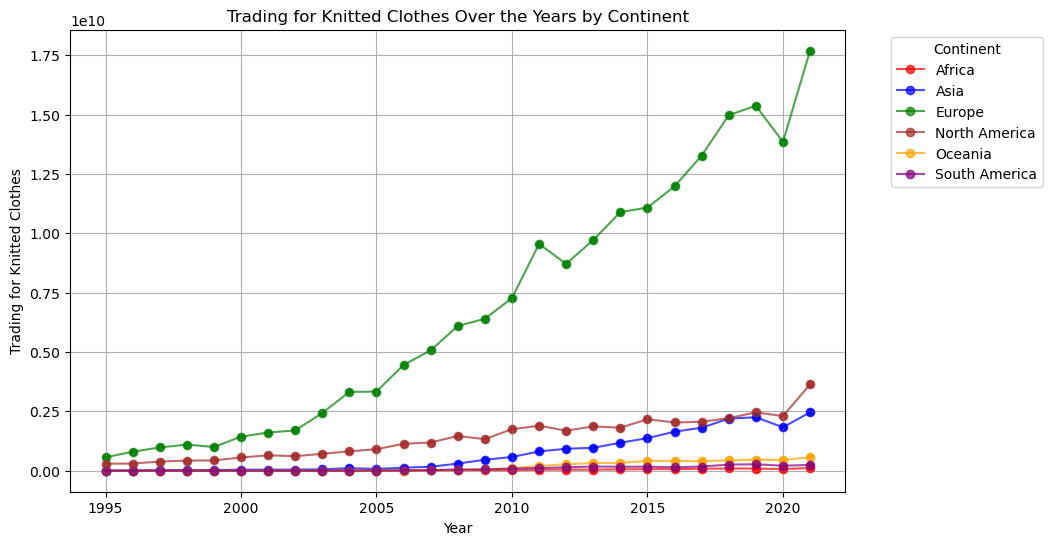

In [22]:
data = {
    'Continent': continent_list_plot,
    'Trading for Knitted Clothes': knitted_country_list,
    'Year': years_list
}

df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a color map for each continent
colors = ['red', 'blue', 'green', 'brown', 'orange', 'purple', 'magenta']
color_map = dict(zip(continent_list, colors))

# Plotting each data point
for continent, group in df.groupby('Continent'):
    plt.scatter(group['Year'], group['Trading for Knitted Clothes'], label='', color=color_map[continent], s=20, alpha=0.7)
    plt.plot(group['Year'], group['Trading for Knitted Clothes'], label=continent, color=color_map[continent], marker='o', linestyle='-', alpha=0.7)

# Set plot properties
plt.title('Trading for Knitted Clothes Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Trading for Knitted Clothes')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the graph
plt.show()

In [23]:
europe_countries_knitted = knitted_df[knitted_df['Continent'] == 'Europe']['Country'].unique()
trade_list_knitted_europe = []

for country in europe_countries_knitted:
  trade_value = np.log10(knitted_df[(knitted_df['Country'] == country) & (knitted_df['Year'] == i)]['Trade Value'].sum())
  trade_list_knitted_europe.append(trade_value)

knitted_coutries = pd.DataFrame({'Country': europe_countries_knitted, 'Trade Value': trade_list_knitted_europe})
knitted_coutries = knitted_coutries.sort_values(by='Trade Value', ascending=False)
knitted_coutries['Trade Value'].replace([np.inf, -np.inf], inplace=True)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2971949865.py:5: RuntimeWarning:

divide by zero encountered in log10



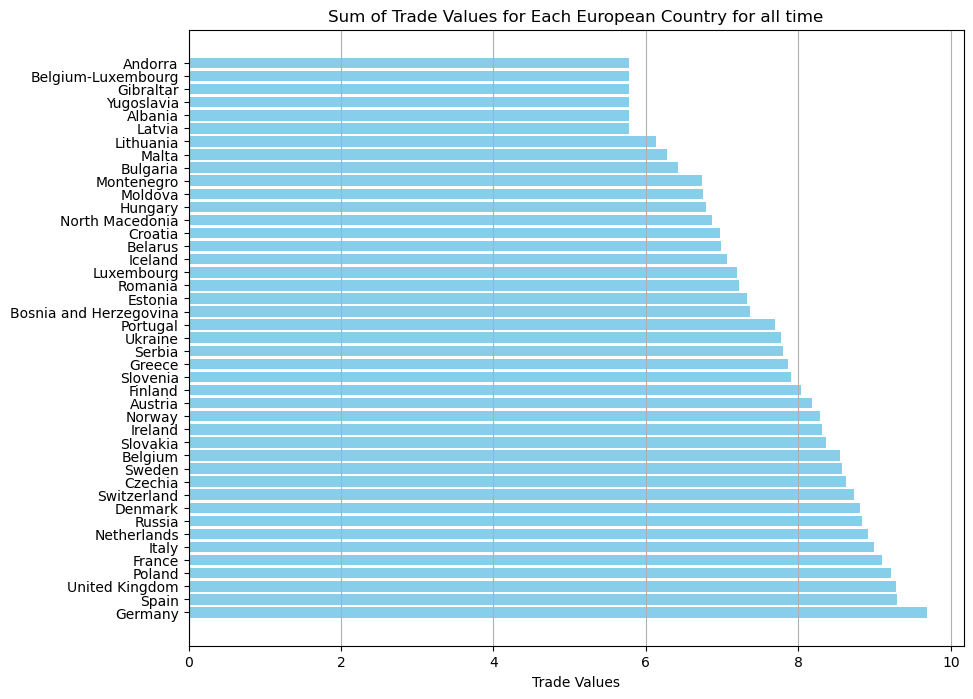

In [24]:
# Plotting the horizontal histogram
plt.figure(figsize=(10, 8))
plt.barh(knitted_coutries['Country'], knitted_coutries['Trade Value'], color='skyblue')
plt.xlabel('Trade Values')
plt.title('Sum of Trade Values for Each European Country for all time')
plt.grid(axis='x')

# Show the plot
plt.show()

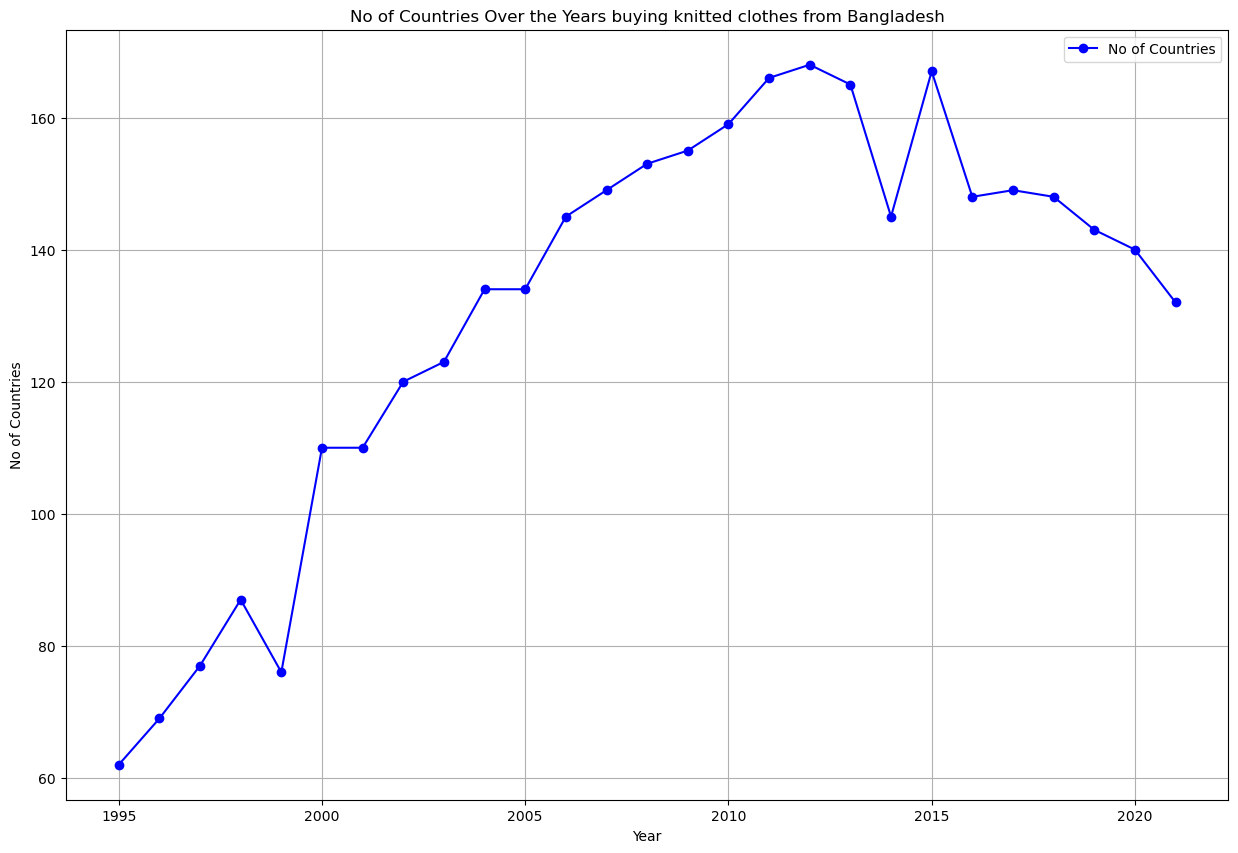

In [25]:
no_of_countries_knitted_df = pd.DataFrame()

for year in range(1995,2022):
  no_of_countries = knitted_df[knitted_df['Year'] == year]['Country'].count()
  df = pd.DataFrame({'Year': year, 'No of countries': no_of_countries}, index=[0])
  no_of_countries_knitted_df = pd.concat([no_of_countries_knitted_df, df], ignore_index=True)

plt.figure(figsize=(15,10))
plt.plot(no_of_countries_knitted_df['Year'], no_of_countries_knitted_df['No of countries'], marker='o', linestyle='-', color='b', label='No of Countries')
plt.xlabel('Year')
plt.ylabel('No of Countries')
plt.title('No of Countries Over the Years buying knitted clothes from Bangladesh')
plt.grid(True)
plt.legend()
plt.show()

### Load Non knitted data

In [26]:
non_knitted_df = pd.DataFrame()

for year in range(1995,2022):
  product = pd.read_json(f'data/{year}/Destinations-of-Non-knitted-clothing-accesories-{year}.json')
  product['Year'] = year
  non_knitted_df = pd.concat([non_knitted_df, product], ignore_index=True)

non_knitted_df

,Continent ID,Continent,Country ID,Country,ISO 3,Trade Value,Year
0,af,Africa,afago,Angola,ago,15783.0,1995
1,af,Africa,afciv,Cote d'Ivoire,civ,687.0,1995
2,af,Africa,afcog,Republic of the Congo,cog,104831.0,1995
3,af,Africa,afdza,Algeria,dza,114087.0,1995
4,af,Africa,afegy,Egypt,egy,62706.0,1995
...,...,...,...,...,...,...,...
3505,sa,South America,sacol,Colombia,col,43931204.0,2021
3506,sa,South America,saecu,Ecuador,ecu,8594614.0,2021
3507,sa,South America,saper,Peru,per,26823690.0,2021
3508,sa,South America,sapry,Paraguay,pry,1520776.0,2021


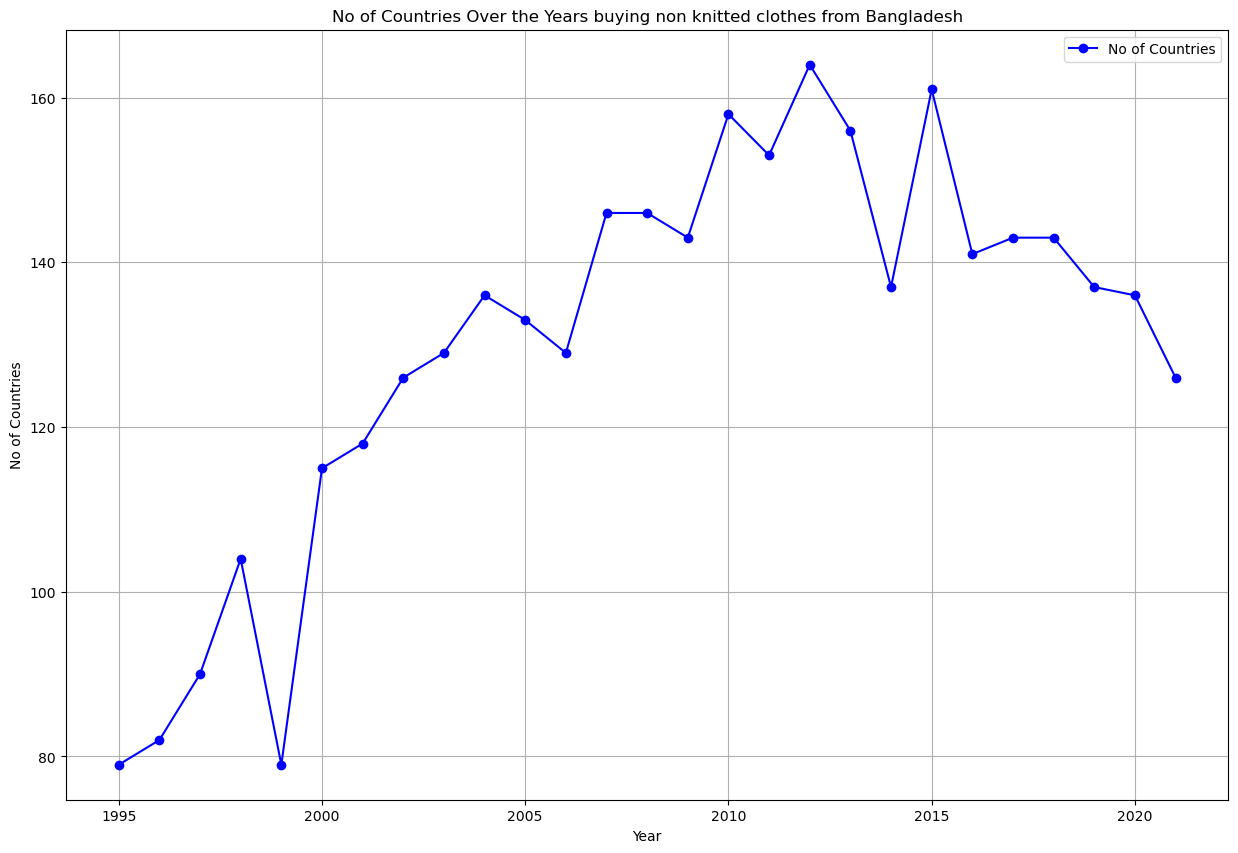

In [27]:
no_of_countries_non_knitted_df = pd.DataFrame()

for year in range(1995,2022):
  no_of_countries = non_knitted_df[non_knitted_df['Year'] == year]['Country'].count()
  df = pd.DataFrame({'Year': year, 'No of countries': no_of_countries}, index=[0])
  no_of_countries_non_knitted_df = pd.concat([no_of_countries_non_knitted_df, df], ignore_index=True)

plt.figure(figsize=(15,10))
plt.plot(no_of_countries_non_knitted_df['Year'], no_of_countries_non_knitted_df['No of countries'], marker='o', linestyle='-', color='b', label='No of Countries')
plt.xlabel('Year')
plt.ylabel('No of Countries')
plt.title('No of Countries Over the Years buying non knitted clothes from Bangladesh')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
years_list = []
non_knitted_country_list = []
continent_list = non_knitted_df['Continent'].unique()
continent_list_plot = []

for year in range(1995,2022):
  for continent in continent_list:
    years_list.append(year)
    continent_list_plot.append(continent)
    non_knitted_country_list.append(non_knitted_df[(non_knitted_df['Continent'] == continent) & (non_knitted_df['Year'] == year)]['Trade Value'].sum())

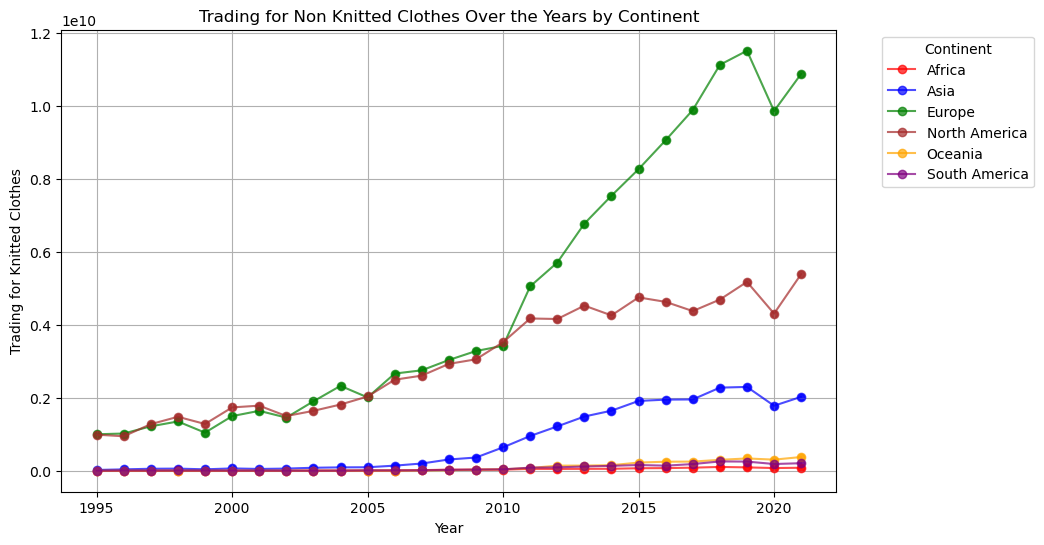

In [29]:
data = {
    'Continent': continent_list_plot,
    'Trading for Non Knitted Clothes': non_knitted_country_list,
    'Year': years_list
}

df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a color map for each continent
colors = ['red', 'blue', 'green', 'brown', 'orange', 'purple', 'magenta']
color_map = dict(zip(continent_list, colors))

# Plotting each data point
for continent, group in df.groupby('Continent'):
    plt.scatter(group['Year'], group['Trading for Non Knitted Clothes'], label='', color=color_map[continent], s=20, alpha=0.7)
    plt.plot(group['Year'], group['Trading for Non Knitted Clothes'], label=continent, color=color_map[continent], marker='o', linestyle='-', alpha=0.7)

# Set plot properties
plt.title('Trading for Non Knitted Clothes Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Trading for Knitted Clothes')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the graph
plt.show()

In [30]:
europe_countries_non_knitted = non_knitted_df[non_knitted_df['Continent'] == 'Europe']['Country'].unique()
trade_list_non_knitted_europe = []

for country in europe_countries_non_knitted:
  trade_value = np.log10(non_knitted_df[(non_knitted_df['Country'] == country) & (non_knitted_df['Year'] == i)]['Trade Value'].sum())
  trade_list_non_knitted_europe.append(trade_value)

non_knitted_coutries = pd.DataFrame({'Country': europe_countries_knitted, 'Trade Value': trade_list_knitted_europe})
non_knitted_coutries = non_knitted_coutries.sort_values(by='Trade Value', ascending=False)
non_knitted_coutries['Trade Value'].replace([np.inf, -np.inf], inplace=True)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\3127926714.py:5: RuntimeWarning:

divide by zero encountered in log10



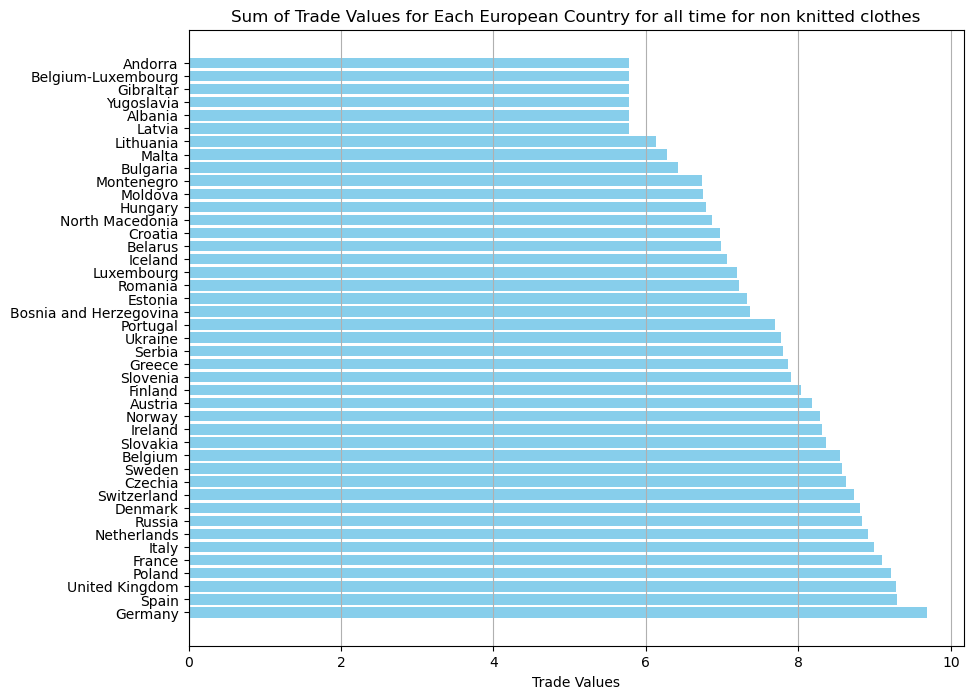

In [31]:
# Plotting the horizontal histogram
plt.figure(figsize=(10, 8))
plt.barh(non_knitted_coutries['Country'], non_knitted_coutries['Trade Value'], color='skyblue')
plt.xlabel('Trade Values')
plt.title('Sum of Trade Values for Each European Country for all time for non knitted clothes')
plt.grid(axis='x')

# Show the plot
plt.show()

### Load vegetable data

In [32]:
vegetable_df = pd.DataFrame()

for year in range(1995,2022):
  product = pd.read_json(f'data/{year}/Destinations-of-Vegetable-textile-fibers-paper-yarn--fabrics-{year}.json')
  product['Year'] = year
  vegetable_df = pd.concat([vegetable_df, product], ignore_index=True)

vegetable_df

,Continent ID,Continent,Country ID,Country,ISO 3,Trade Value,Year
0,af,Africa,afciv,Cote d'Ivoire,civ,8143744.0,1995
1,af,Africa,afcmr,Cameroon,cmr,27228.0,1995
2,af,Africa,afcod,Democratic Republic of the Congo,cod,142527.0,1995
3,af,Africa,afegy,Egypt,egy,9507551.0,1995
4,af,Africa,afeth,Ethiopia,eth,1756659.0,1995
...,...,...,...,...,...,...,...
2710,sa,South America,sachl,Chile,chl,557137.0,2021
2711,sa,South America,sacol,Colombia,col,233332.0,2021
2712,sa,South America,saguy,Guyana,guy,1944.0,2021
2713,sa,South America,saper,Peru,per,86492.0,2021


In [33]:
years_list = []
vegetable_country_list = []
continent_list = vegetable_df['Continent'].unique()
continent_list_plot = []

for year in range(1995,2022):
  for continent in continent_list:
    years_list.append(year)
    continent_list_plot.append(continent)
    vegetable_country_list.append(vegetable_df[(vegetable_df['Continent'] == continent) & (vegetable_df['Year'] == year)]['Trade Value'].sum())

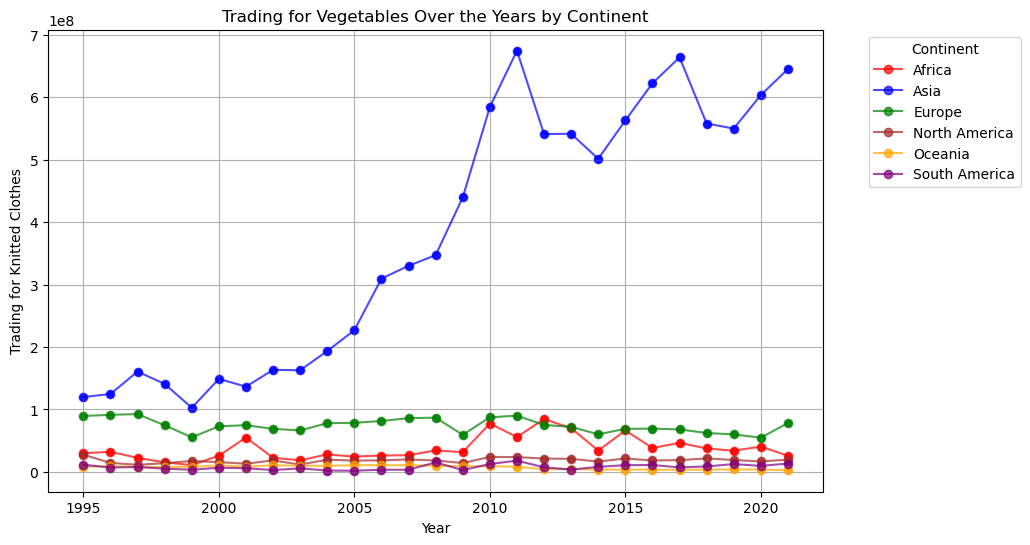

In [34]:
data = {
    'Continent': continent_list_plot,
    'Trading for Vegetables': vegetable_country_list,
    'Year': years_list
}

df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Create a color map for each continent
colors = ['red', 'blue', 'green', 'brown', 'orange', 'purple', 'magenta']
color_map = dict(zip(continent_list, colors))

# Plotting each data point
for continent, group in df.groupby('Continent'):
    plt.scatter(group['Year'], group['Trading for Vegetables'], label='', color=color_map[continent], s=20, alpha=0.7)
    plt.plot(group['Year'], group['Trading for Vegetables'], label=continent, color=color_map[continent], marker='o', linestyle='-', alpha=0.7)

# Set plot properties
plt.title('Trading for Vegetables Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Trading for Knitted Clothes')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the graph
plt.show()

In [35]:
asian_countries_vegetable = vegetable_df[vegetable_df['Continent'] == 'Asia']['Country'].unique()
trade_list_vegetable_asia = []

for country in asian_countries_vegetable:
  trade_value = np.log10(vegetable_df[(vegetable_df['Country'] == country) & (vegetable_df['Year'] == i)]['Trade Value'].sum())
  trade_list_vegetable_asia.append(trade_value)

vegetable_coutries = pd.DataFrame({'Country': asian_countries_vegetable, 'Trade Value': trade_list_vegetable_asia})
vegetable_coutries = vegetable_coutries.sort_values(by='Trade Value', ascending=False)
vegetable_coutries['Trade Value'].replace([np.inf, -np.inf], inplace=True)

C:\Users\prang\AppData\Local\Temp\ipykernel_18000\2373456834.py:5: RuntimeWarning:

divide by zero encountered in log10



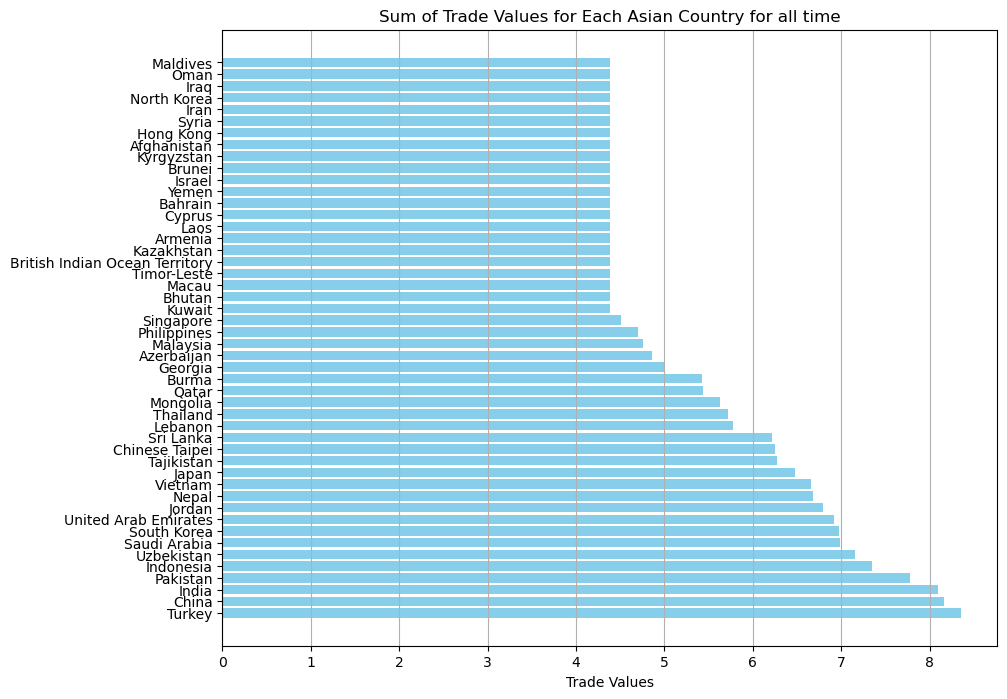

In [36]:
# Plotting the horizontal histogram
plt.figure(figsize=(10, 8))
plt.barh(vegetable_coutries['Country'], vegetable_coutries['Trade Value'], color='skyblue')
plt.xlabel('Trade Values')
plt.title('Sum of Trade Values for Each Asian Country for all time')
plt.grid(axis='x')

# Show the plot
plt.show()

### Choropleth World Map

In [37]:
mean_trade_value_df = pd.DataFrame()

country_list = country_df['Country'].unique()

for country in country_list:
  mean_trade_value = (country_df[country_df['Country'] == country]['Trade Value'].mean()) / 10**6
  mean_trade_value_log = np.log10(mean_trade_value)
  df = pd.DataFrame({'Country': country, 'Mean Trade Value (USD in millions)': mean_trade_value, 'Mean Trade Value logscale': mean_trade_value_log}, index=[0])
  mean_trade_value_df = pd.concat([mean_trade_value_df, df], ignore_index=True)

mean_trade_value_df

,Country,Mean Trade Value (USD in millions),Mean Trade Value logscale
0,Angola,1.380257,0.139960
1,Burundi,0.295860,-0.528913
2,Benin,0.511332,-0.291297
3,Burkina Faso,0.220996,-0.655615
4,Cote d'Ivoire,13.386670,1.126673
...,...,...,...
217,Palau,0.011351,-1.944953
218,Turkmenistan,0.003883,-2.410870
219,Christmas Island,0.001587,-2.799423
220,Chad,0.111432,-0.952990


In [38]:
world_map = json.load(open('data/world_map.json', 'r'))

In [39]:
world_map['features'][0]['properties']['ne_id']

1159320525

In [40]:
country_id = {}

for feature in world_map['features']:
  feature['id'] = feature['properties']['ne_id']
  country_id[feature['properties']['name']] = feature['id']

In [41]:
mean_trade_value_df['id'] = mean_trade_value_df['Country'].apply(lambda x: country_id[x] if x in country_id else None)

In [42]:
mean_trade_value_df.dropna(inplace=True)
mean_trade_value_df['id'] = mean_trade_value_df['id'].astype(int)

In [43]:
mean_trade_value_df

,Country,Mean Trade Value (USD in millions),Mean Trade Value logscale,id
0,Angola,1.380257,0.139960,1159320323
1,Burundi,0.295860,-0.528913,1159320387
2,Benin,0.511332,-0.291297,1159320399
3,Burkina Faso,0.220996,-0.655615,1159320405
5,Cameroon,1.767022,0.247242,1159320509
...,...,...,...,...
216,Micronesia,0.004241,-2.372549,1159320691
217,Palau,0.011351,-1.944953,1159321171
218,Turkmenistan,0.003883,-2.410870,1159321309
220,Chad,0.111432,-0.952990,1159321301


In [45]:
fig = px.choropleth(
    mean_trade_value_df,
    locations="id",
    geojson=world_map,
    color="Mean Trade Value logscale",
    hover_name="Country",
    hover_data=["Mean Trade Value (USD in millions)"],
    title="Bangladesh Mean Trade Value over the year worldwide",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()